<a href="https://colab.research.google.com/github/lakuzmin/antispoof/blob/main/%D0%92%D1%81%D0%BF%D0%BE%D0%BC%D0%BE%D0%B3%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81_ID_R%26D_facial_antispoofing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
#%reload_ext autoreload
#%autoreload 2
%matplotlib inline

In [ ]:
!date '+%d/%m/%Y %H:%M:%S'

12/09/2018 06:52:20


# Установка CUDA и cuDNN и dlib

In [ ]:
#Установка imutils
!pip install imutils

  Running setup.py bdist_wheel for imutils ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/4c/ff/aa/824fb9efc5b8c740d54cd8bc19c7e85fbb8d115c77e56812c7
Successfully built imutils


In [ ]:
#Установка CUDA 9
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64-deb -O cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-toolkit-9.0
#!apt-get install cuda

In [ ]:
#Качаем  cuDNN 7.1 для CUDA 9

#cudnn-9.0-linux-x64-v7.1.tgz - скачан на мой google drive
!wget --load-cookies cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1kX0ufwW4pApHNcsQcaXBgsZc5x_xb_Ts' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1kX0ufwW4pApHNcsQcaXBgsZc5x_xb_Ts" -O cudnn-9.0-linux-x64-v7.1.tgz
!tar -xzvf cudnn-9.0-linux-x64-v7.1.tgz
  


In [ ]:
#Установка GCC,G++ версии 6 для dlib

!apt-get install gcc-6 g++-6 -y -qq;
!ln -s /usr/bin/gcc-6 /usr/local/cuda/bin/gcc;
!ln -s /usr/bin/g++-6 /usr/local/cuda/bin/g++;


In [ ]:
#Установка cuDNN

!cp cuda/include/cudnn.h /usr/local/cuda/include
!cp cuda/lib64/libcudnn* /usr/local/cuda/lib64
!chmod a+r /usr/local/cuda/include/cudnn.h /usr/local/cuda/lib64/libcudnn*

cp: cannot stat 'cuda/include/cudnn.h': No such file or directory
cp: cannot stat 'cuda/lib64/libcudnn*': No such file or directory
chmod: cannot access '/usr/local/cuda/include/cudnn.h': No such file or directory
chmod: cannot access '/usr/local/cuda/lib64/libcudnn*': No such file or directory


In [ ]:
#установка cmake для компиляции dlib

!apt update
!apt install -y cmake

In [ ]:
#Установка компилированного dlib
!wget --load-cookies cookies1.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies cookies1.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=148mCljcQXOJmN7_tYGBFBCzwPha1SLlM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=148mCljcQXOJmN7_tYGBFBCzwPha1SLlM" -O - |  tar -zxv && rm -rf cookies1.txt


In [ ]:
!cd dlib; CC=/usr/bin/gcc-6 CXX=/usr/bin/g++-6 python setup.py install --yes USE_AVX_INSTRUCTIONS --yes DLIB_USE_CUDA


In [ ]:
import shutil
shutil.rmtree('dlib')

# Установка fast.ai

In [ ]:
#Установка пакетов для colab
#    Install pytorch using ” 
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl && pip install torchvision
#Install fast.ai using ” 
!pip install git+https://github.com/fastai/fastai.git
#!pip install fastai
#   Install libSM using ” 
!apt update && apt install -y libsm6 libxext6
#Похоже здесь надо вручную рестартовать runtime

# Установка CUDA разных версий (не идут на COLAB  - другие драйвера)

In [ ]:
#Установка CUDA 8
#v1
#https://medium.com/@iphoenix179/running-cuda-c-c-in-jupyter-or-how-to-run-nvcc-in-google-colab-663d33f53772
!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb;
!dpkg -i cuda-repo-ubuntu1604–8–0-local-ga2_8.0.61–1_amd64-deb 2> /dev/null;
!apt-key add /var/cuda-repo-8–0-local-ga2/7fa2af80.pub;
!apt-get update -qq;
!apt-get install cuda gcc-5 g++-5 -y -qq;
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc;
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++;
!apt install cuda-8.0;

In [ ]:
#Установка CUDA 9.2
#v2
#https://stackoverflow.com/questions/50560395/how-to-install-cuda-in-google-colab-gpus
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda

In [ ]:
#Качаем  cuDNN  для CUDA 9.2

#cudnn-9.2-linux-x64-v7.1.tgz - скачан на мой google drive
!wget --load-cookies cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1Xs2SHmH6d3zGhxfy7HDtfuvsfe5HPBmf' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Xs2SHmH6d3zGhxfy7HDtfuvsfe5HPBmf" -O cudnn-9.2-linux-x64-v7.1.tgz
!tar -xzvf cudnn-9.2-linux-x64-v7.1.tgz



In [ ]:
#Качаем  cuDNN 7 для CUDA 9.1

#cudnn-9.1-linux-x64-v7.1.tgz - скачан на мой google drive
!wget --load-cookies cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1UtghPvfultgOvKA56a6F0qUvXhKpLMAw' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1UtghPvfultgOvKA56a6F0qUvXhKpLMAw" -O cudnn-9.1-linux-x64-v7.tgz
!tar -xzvf cudnn-9.1-linux-x64-v7.tgz


In [ ]:
#Качаем  cuDNN 7.1 для CUDA 9.1

#cudnn-9.1-linux-x64-v7.1.tgz - скачан на мой google drive
!wget --load-cookies cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1z-ApH57y3U6vsis3zftfQ9EzGNo8T-Hg' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1z-ApH57y3U6vsis3zftfQ9EzGNo8T-Hg" -O cudnn-9.1-linux-x64-v7.1.tgz
!tar -xzvf cudnn-9.1-linux-x64-v7.1.tgz



In [ ]:
#Качаем  cuDNN  для CUDA 8

#cudnn-8.0-linux-x64-v7.1.tgz - скачан на мой google drive
!wget --load-cookies cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1fsxegeI_BfyTgppX8ULbTiVIa15JcuX-' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1fsxegeI_BfyTgppX8ULbTiVIa15JcuX-" -O cudnn-8.0-linux-x64-v7.1.tgz
!tar -xzvf cudnn-8.0-linux-x64-v7.1.tgz

In [ ]:
!git clone https://github.com/YadiraF/PRNet
!cd PRNet;python run_basics.py

In [ ]:
#Download the PRN trained model at BaiduDrive or GoogleDrive, and put it into Data/net-data
#https://drive.google.com/file/d/1UoE-XuW1SDLUjZmJPkIZ1MLxvQFgmTFH/view?usp=sharing
!wget -O PRNet/Data/net-data/256_256_resfcn256_weight.data-00000-of-00001  --load-cookies cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=1UoE-XuW1SDLUjZmJPkIZ1MLxvQFgmTFH' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1UoE-XuW1SDLUjZmJPkIZ1MLxvQFgmTFH" 

In [ ]:
#Проверка версий драйверов. Все настроено на 384.111. При другой версии возможно нужны совместимые версии CUDA, cuDNN. GCC, G++ (9.0, 7.1 для 9.0, 6 соответственно)
#совместимость https://stackoverflow.com/questions/30820513/what-is-version-of-cuda-for-nvidia-304-125/30820690#30820690
!nvidia-smi

# Черновики по выделению лиц

In [ ]:
#После установки dlib нужно выолнить Runtime/Restart runtime...
import os
import numpy as np
import dlib
from skimage.transform import estimate_transform, warp
from skimage.io import imread, imsave

detector_path = 'dlib/models/mmod_human_face_detector.dat'
face_detector = dlib.cnn_face_detection_model_v1(detector_path)
resolution_inp = 234
resolution_op = 234


In [ ]:
for folder, subs, files in os.walk('data'):
  for filename in files:
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')): 
      fn=os.path.join(folder, filename)
      image = imread(fn)
      detected_faces=face_detector(image,1)
      idx=0
      if len(detected_faces) == 0:
        print('no detected face - '+fn)
        continue
      if len(detected_faces) > 1:
        #Надо выбирать самое большое
        maxarea=detected_faces[0].rect.area()
        for i in range(1,len(detected_faces)):
          if detected_faces[i].rect.area()>maxarea:
            idx=i
            maxarea=detected_faces[i].rect.area()
        print('detected faces: {}/{})-{}'.format(len(detected_faces),idx,fn)
      d = detected_faces[idx].rect 
      left = d.left(); right = d.right(); top = d.top(); bottom = d.bottom()
      old_size = (right - left + bottom - top)/2
      center = np.array([right - (right - left) / 2.0, bottom - (bottom - top) / 2.0 + old_size*0.14])
      size = int(old_size*1.58)
      src_pts = np.array([[center[0]-size/2, center[1]-size/2], [center[0] - size/2, center[1]+size/2], [center[0]+size/2, center[1]-size/2]])
      DST_PTS = np.array([[0,0], [0,resolution_inp - 1], [resolution_inp - 1, 0]])
      tform = estimate_transform('similarity', src_pts, DST_PTS)
      image = image/255.
      cropped_image = warp(image, tform.inverse, output_shape=(resolution_inp, resolution_inp))
      newfolder='d'+folder
      if not os.path.exists(newfolder):
        try:
          os.makedirs(newfolder)
        except OSError as exception:
          if exception.errno != errno.EEXIST:
            raise        
      imsave('d'+fn, cropped_image)



SyntaxError: ignored

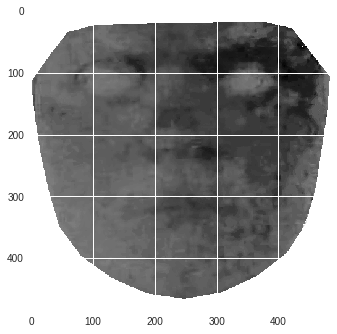

In [ ]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
image = imread('datahsv/data/valid/spoof/0259.png')
plt.imshow(image[:,:,2]);


In [ ]:
detected_faces=face_detector(image,1)

In [ ]:
d = detected_faces[0].rect ## only use the first detected face (assume that each input image only contains one face)
left = d.left(); right = d.right(); top = d.top(); bottom = d.bottom()
old_size = (right - left + bottom - top)/2
center = np.array([right - (right - left) / 2.0, bottom - (bottom - top) / 2.0 + old_size*0.14])
size = int(old_size*1.58)


In [ ]:
import matplotlib.patches as patches
#im = np.array(Image.open('stinkbug.png'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(image)

# Create a Rectangle patch
rect = patches.Rectangle((left,top),right-left,bottom-top,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

In [ ]:
src_pts = np.array([[center[0]-size/2, center[1]-size/2], [center[0] - size/2, center[1]+size/2], [center[0]+size/2, center[1]-size/2]])
DST_PTS = np.array([[0,0], [0,256 - 1], [256 - 1, 0]])
tform = estimate_transform('similarity', src_pts, DST_PTS)
        
image = image/255.
cropped_image = warp(image, tform.inverse, output_shape=(256, 256))


In [ ]:
plt.imshow(cropped_image);

In [ ]:
os.path.join('data','test')

'data/test'

# Процедура выделения лиц

In [ ]:
#рабочая
#from skimage.io import imread, imsave

#import matplotlib.pyplot as plt
from imutils import face_utils
import imutils
import numpy as np
import collections
import dlib
import cv2
import os
face_detector = dlib.cnn_face_detection_model_v1('dlib/models/mmod_human_face_detector.dat')
predictor = dlib.shape_predictor('dlib/models/shape_predictor_68_face_landmarks.dat')

#Сохраняем в заданную папку, при необходимости создаем ее
def imsave_subfolder(fldr,fn,img):
  if not os.path.exists(fldr):
    try:
      os.makedirs(fldr)
    except OSError as exception:
      if exception.errno != errno.EEXIST:
        raise   
  cv2.imwrite(os.path.join(fldr, fn)[:-3]+'png', img)  
#  cv2.imwrite(os.path.join(fldr, fn)[:-3]+'jpg', img,  [int(cv2.IMWRITE_JPEG_QUALITY), 100])  
#  imsave(os.path.join(fldr, fn), img)  

def face_remap(shape):
    remapped_image = cv2.convexHull(shape)
    return remapped_image
  
def processFolder(inDir,outDir,skip0):
  print('PROCESS - '+inDir)
  for folder, subs, files in os.walk(inDir):
    for filename in files:
      if filename.lower().endswith(('.png', '.jpg')): 
        infn=os.path.join(folder, filename)
        outpath=os.path.join(outDir, folder)
        image=cv2.imread(infn)
#        image = imread(infn)
        detected_faces=face_detector(image,1)
        idx=0
        if len(detected_faces) == 0:
          #лица не обнаружены, пробуем повернуть
          for n in range(1,4):
            image1=np.rot90(image,k=n,axes=(1,0))
            detected_faces=face_detector(image1,1)
            if len(detected_faces) > 0:
              image=image1
              break
          if len(detected_faces) == 0:
            print('no detected face - '+infn)
            if not skip0:
              imsave_subfolder(outpath, filename, image) 
            continue
        if len(detected_faces) > 1:
          #Надо выбирать самое большое confidence
          maxconf=detected_faces[0].confidence
          for i in range(1,len(detected_faces)):
            if detected_faces[i].confidence>maxconf:
              idx=i
              maxconf=detected_faces[i].confidence
          print("detected faces: {}/{})-{}".format(len(detected_faces),idx,infn))
        out_face = np.full_like(image,0) #пустой цвет
        shape = predictor(image, detected_faces[idx].rect)
        shape = face_utils.shape_to_np(shape)

        #initialize mask array
        remapped_shape = np.zeros_like(shape) 
        feature_mask = np.zeros((image.shape[0], image.shape[1]))   

        # we extract the face
        remapped_shape = face_remap(shape)
        cv2.fillConvexPoly(feature_mask, remapped_shape, 1)
        #cv2.fillConvexPoly(feature_mask, remapped_shape[0:27], 1)
        feature_mask = feature_mask.astype(np.bool)
        out_face[feature_mask] = image[feature_mask]
   
        #вырезаем и дополняем до квадратного
        smax=np.minimum(np.max(shape,axis=0),out_face.shape[0:2][::-1])
        smin=np.maximum(np.min(shape,axis=0),[0,0])
        h=smax[1]-smin[1]+1 #высота области
        w=smax[0]-smin[0]+1 #ширина
        s=max(h,w)
        ni=np.pad(out_face[smin[1]:smax[1]+1,smin[0]:smax[0]+1,:],(((s-h)/2,(s-h)-(s-h)/2),((s-w)/2,(s-w)-(s-w)/2),(0,0)),'constant', constant_values=(0))    

        try:
          imsave_subfolder(outpath, filename, ni) 
        except:
          print("Ошибка при сохранении - "+infn)
          if not skip0:
            imsave_subfolder(outpath, filename, image) 
#processFolder('oulu','ouluout',True)        
#processFolder('LLFFSD','LLFFSDoutcv2',True)        
#processFolder('data/test','dataout',False)                
#processFolder('data/train','dataout',True)                
#processFolder('data/valid','dataout',True)                
#processFolder('nuaa','nuaaout',True)                
#processFolder('lfw','lfwout',True)                

#processFolder('Test','siw',True)                
#processFolder('Train','siw',True)                
processFolder('oulu','ouluout',True)                


PROCESS - oulu
detected faces: 2/0)-oulu/Train_files/6_2_03_5 80.jpg
detected faces: 2/0)-oulu/Train_files/3_3_18_5 80.jpg
detected faces: 2/0)-oulu/Train_files/5_2_05_5 80.jpg
no detected face - oulu/Train_files/4_1_06_3 80.jpg
detected faces: 2/0)-oulu/Train_files/3_1_05_5 80.jpg
detected faces: 2/0)-oulu/Train_files/5_2_18_5 80.jpg
no detected face - oulu/Train_files/1_1_06_3 80.jpg
detected faces: 2/0)-oulu/Train_files/1_2_18_5 80.jpg
detected faces: 2/0)-oulu/Train_files/2_2_05_5 80.jpg
detected faces: 2/0)-oulu/Train_files/1_1_05_5 80.jpg
detected faces: 2/0)-oulu/Train_files/2_2_03_5 80.jpg
detected faces: 2/0)-oulu/Train_files/1_3_02_1 80.jpg
no detected face - oulu/Train_files/1_1_06_2 80.jpg
detected faces: 2/0)-oulu/Test_files/6_3_53_5 80.jpg
detected faces: 2/0)-oulu/Test_files/5_2_36_5 80.jpg
detected faces: 2/0)-oulu/Test_files/4_2_46_1 80.jpg
detected faces: 2/0)-oulu/Dev_files/5_3_29_4 80.jpg
detected faces: 2/0)-oulu/Dev_files/5_1_34_1 80.jpg
detected faces: 2/0)-oulu/

1.08540260792


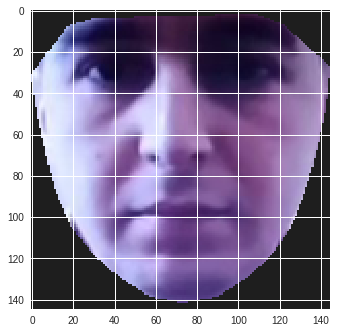

In [ ]:
#Тест
#https://stackoverflow.com/questions/46712766/cropping-face-using-dlib-facial-landmarks
#from skimage.transform import estimate_transform, warp
from skimage.io import imread, imsave

import matplotlib.pyplot as plt
from imutils import face_utils
import imutils
import numpy as np
import collections
import dlib
import cv2

def face_remap(shape):
    remapped_image = cv2.convexHull(shape)
    return remapped_image
"""
MAIN CODE STARTS HERE
"""
# load the input image, resize it, and convert it to grayscale
image = imread("data/train/spoof/FT720P_G780_REDMI4X_id2_s0_98.png")
#image = cv2.imread("data/train/real/YOUTUBE_id46_s0_251.png")
#image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#out_face = np.zeros_like(image)
out_face = np.full_like(image,30)

# initialize dlib's face detector (HOG-based) and then create the facial landmark predictor
detector_path = 'dlib/models/mmod_human_face_detector.dat'
detector = dlib.cnn_face_detection_model_v1(detector_path)
#detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('dlib/models/shape_predictor_68_face_landmarks.dat')

# detect faces in the grayscale image
#rects = detector(gray, 1)
rects = detector(image, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
   """
   Determine the facial landmarks for the face region, then convert the facial landmark (x, y)-coordinates to a NumPy array
   """
#   shape = predictor(gray, rect.rect)
   shape = predictor(image, rect.rect)
   shape = face_utils.shape_to_np(shape)

   #initialize mask array
   remapped_shape = np.zeros_like(shape) 
   feature_mask = np.zeros((image.shape[0], image.shape[1]))   

   # we extract the face
   remapped_shape = face_remap(shape)
   cv2.fillConvexPoly(feature_mask, remapped_shape, 1)
   #cv2.fillConvexPoly(feature_mask, remapped_shape[0:27], 1)
   feature_mask = feature_mask.astype(np.bool)
   out_face[feature_mask] = image[feature_mask]
   
   #вырезаем и дополняем до квадратного
   smax=np.minimum(np.max(shape,axis=0),out_face.shape[0:2][::-1])
   smin=np.maximum(np.min(shape,axis=0),[0,0])
   h=smax[1]-smin[1]+1 #высота области
   w=smax[0]-smin[0]+1 #ширина
   s=max(h,w)
   ni=np.pad(out_face[smin[1]:smax[1]+1,smin[0]:smax[0]+1,:],(((s-h)/2,(s-h)-(s-h)/2),((s-w)/2,(s-w)-(s-w)/2),(0,0)),'constant', constant_values=(30))    
   #imsave("out_face.png", ni) 
   #cv2.imwrite("out_face.png", out_face)
   #cv2.imshow("mask_inv", out_face)
   plt.imshow(ni)
   print(rect.confidence)
   break 
   

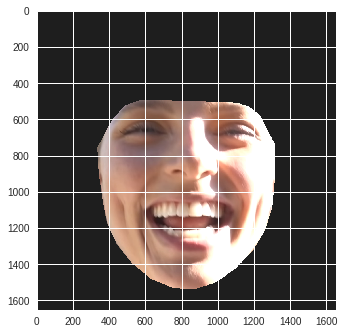

In [ ]:
plt.imshow(out_face)


In [ ]:
smax=np.max(shape,axis=0)
smin=np.min(shape,axis=0)
h=smax[1]-smin[1]
w=smax[0]-smin[0]
s=np.max([h,w])+1
ni=np.pad(out_face[smin[1]:smax[1],smin[0]:smax[0],:],(((s-h)/2,(s-h)-(s-h)/2),((s-w)/2,(s-w)-(s-w)/2),(0,0)),'constant', constant_values=(10))

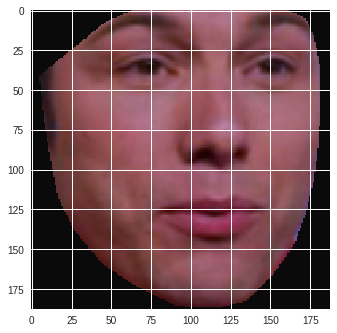

In [ ]:

plt.imshow(ni)

In [ ]:
out_face[0:2,0:2,:]

array([[[10, 10, 10],
        [10, 10, 10]],

       [[10, 10, 10],
        [10, 10, 10]]], dtype=uint8)

In [ ]:
!ls -l

total 1809984
-rw-r--r--  1 root root       2537 Sep  4 12:15 adc.json
drwxr-xr-x  4 root root       4096 Sep  4 11:51 cuda
-rw-r--r--  1 root root 1212738714 Sep 22  2017 cuda-repo-ubuntu1604-9-0-local_9.0.176-1_amd64.deb
-rw-r--r--  1 root root  409222354 Sep  4 11:51 cudnn-9.0-linux-x64-v7.1.tgz
drwxr-xr-x  3 root root       4096 Sep  4 12:34 data
drwxr-xr-x 12 root root       4096 Sep  4 12:11 dlib
-rw-r--r--  1 root root  131708056 Sep  4 12:13 dlibpy2.7.tgz
-rw-r--r--  1 root root      14448 Sep  4 13:09 out_face.png
drwxr-xr-x  2 root root       4096 Aug 30 21:39 sample_data
-rw-r--r--  1 root root   99693937 Jul 24  2015 shape_predictor_68_face_landmarks.dat


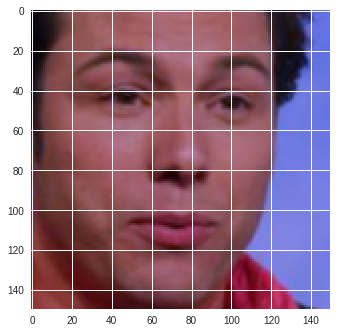

In [ ]:
import matplotlib.pyplot as plt
# Load all the models we need: a detector to find the faces, a shape predictor
# to find face landmarks so we can precisely localize the face
detector_path = 'dlib/models/mmod_human_face_detector.dat'
detector = dlib.cnn_face_detection_model_v1(detector_path)

sp = dlib.shape_predictor('dlib/models/shape_predictor_5_face_landmarks.dat')

# Load the image using Dlib
face_file_path="data/test/K0H73V6O.png"
#img = dlib.load_rgb_image(face_file_path)
img = imread(face_file_path)

# Ask the detector to find the bounding boxes of each face. The 1 in the
# second argument indicates that we should upsample the image 1 time. This
# will make everything bigger and allow us to detect more faces.
dets = detector(img, 1)

num_faces = len(dets)
if num_faces == 0:
    print("Sorry, there were no faces found in '{}'".format(face_file_path))
    exit()

# Find the 5 face landmarks we need to do the alignment.
faces = dlib.full_object_detections()
for detection in dets:
    faces.append(sp(img, detection.rect))

image = dlib.get_face_chip(img, faces[0])
plt.imshow(image);


In [ ]:
for folder, subs, files in os.walk('data'):
   for filename in files:
      print(os.path.join(folder, filename))
      


In [ ]:
ls -l

total 97364
drwxr-xr-x 2 root root     4096 Aug 30 21:39 sample_data/
-rw-r--r-- 1 root root 99693937 Jul 24  2015 shape_predictor_68_face_landmarks.dat


In [ ]:
!bzip2 --help

In [ ]:
!ls dlib/models

mmod_human_face_detector.dat	      shape_predictor_68_face_landmarks.dat
shape_predictor_5_face_landmarks.dat  shape_predictor_68_face_landmarks.dat.bz2


In [ ]:
#Скачиваем модели dlib
!mkdir -p dlib/models

!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 -O dlib/models/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -fd dlib/models/shape_predictor_68_face_landmarks.dat.bz2 

!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2  -O dlib/models/shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -fd dlib/models/shape_predictor_5_face_landmarks.dat.bz2

!wget http://dlib.net/files/mmod_human_face_detector.dat.bz2  -O dlib/models/mmod_human_face_detector.dat.bz2
!bzip2 -fd dlib/models/mmod_human_face_detector.dat.bz2

In [ ]:

!tar --help

In [ ]:
#CUDA 8
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb;
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb
!apt-key add /var/cuda-repo-8-0-local-ga2/7fa2af80.pub
!apt-get update
!apt-get install cuda

In [ ]:
!wget https://developer.nvidia.com/compute/machine-learning/cudnn/v7.0.5/prod2/9.1_20171129/cudnn-9.1-linux-x64-v7-tgz
#!wget https://developer.nvidia.com/compute/cuda/9.1/Prod/local_installers/cuda-repo-ubuntu1604-9-1-local_9.1.85-1_amd64 -O cuda-repo-ubuntu1604-9-1-local_9.1.85-1_amd64.deb

In [ ]:

#CUDA 9.1
!wget https://developer.nvidia.com/compute/cuda/9.1/Prod/local_installers/cuda-repo-ubuntu1604-9-1-local_9.1.85-1_amd64 -O cuda-repo-ubuntu1604-9-1-local_9.1.85-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-1-local_9.1.85-1_amd64.deb
!apt-key add /var/cuda-repo-ubuntu1604-9-1-local_9.1.85-1_amd64/7fa2af80.pub
!apt-get update
!apt-get install cuda

In [ ]:
 #пакуем папку ddata
  !tar -zcvf fromdlib.tgz ddata

# Kill машины COLAB

In [ ]:
!kill -9 -1

# Архивирование и копирование

In [ ]:
!cd LLFFSDoutcv2 && tar -cvf LLFFSD.tar LLFFSD>/dev/null
!cp LLFFSDoutcv2/LLFFSD.tar '/gd/My Drive/Colab/data'

cp: cannot stat 'LLFFSD.tar': No such file or directory


In [ ]:
!cd dataout && tar -cvf data.tar data>/dev/null
!cp dataout/data.tar '/gd/My Drive/Colab/data'

In [ ]:
!cd nuaaout && tar -cvf nuaa.tar nuaa>/dev/null
!cp nuaaout/nuaa.tar '/gd/My Drive/Colab/data'

In [ ]:
!cd lfwout && tar -cvf lfw.tar lfw>/dev/null
!cp lfwout/lfw.tar '/gd/My Drive/Colab/data'

In [ ]:
!tar -cvf siw.tar siw>/dev/null
!cp siw.tar '/gd/My Drive/Colab/data'

In [ ]:
!cd siw && tar -cvf siw.test.tar Test>/dev/null
!cp siw/siw.test.tar '/gd/My Drive/Colab/data'

cp: cannot stat 'siw.test.tar': No such file or directory


In [ ]:
!cd siw && tar -cvf siw.train.tar Train>/dev/null
!cp siw/siw.train.tar '/gd/My Drive/Colab/data'

In [ ]:
ls -l siw

total 5391388
-rw-r--r-- 1 root root 2572820480 Sep 12 15:53 siw.test.tar
-rw-r--r-- 1 root root 2947942400 Sep 12 16:02 siw.train.tar
drwxr-xr-x 4 root root       4096 Sep 12 13:02 Test/
drwxr-xr-x 4 root root       4096 Sep 12 14:16 Train/


In [ ]:
import shutil
shutil.rmtree('siwout')

In [ ]:
!rm '/gd/My Drive/Colab/data/siw.train.tar'

In [ ]:
!tar -xvf '/gd/My Drive/Colab/data/orig/ouluout.tar'>/dev/null

In [ ]:
!cd ouluout && tar -cvf oulu.tar oulu>/dev/null


In [ ]:
!cp ouluout/oulu.tar '/gd/My Drive/Colab/data'

# Сохранение большого файла на Goole Drive

In [ ]:
#Сохраняем файл file_name на диске Google с именем google_name
# Which file to send?
file_name = "hist.tar"
google_name = "hist.tar"
from google.colab import auth
from googleapiclient.http import MediaFileUpload
from googleapiclient.discovery import build

auth.authenticate_user()
drive_service = build('drive', 'v3')

def save_file_to_drive(name, path):
  file_metadata = {'name': name, 'mimeType': 'application/octet-stream'}
  media = MediaFileUpload(path, mimetype='application/octet-stream', resumable=True)
  created = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
  
  return created

save_file_to_drive(google_name, file_name)

{'id': '1PEbBkMuakAD5Qc9W4D3U8s5sXTcob7FP'}

# Downloading data from a Drive file into Python

In [ ]:
# Download the file we just uploaded.
#
# Replace the assignment below with your file ID
# to download a different file.
#
# A file ID looks like: 1uBtlaggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'target_file_id'

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)
print('Downloaded file contents are: {}'.format(downloaded.read()))

Downloaded file contents are: my sample file


# Удаление дерева папок

In [ ]:
import shutil
shutil.rmtree('data')

#Монтирование диска Google

In [ ]:
from google.colab import drive
drive.mount('/gd')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code
Enter your authorization code:
··········
Mounted at /gd


Now we can construct a Drive API client.

In [ ]:
ls '/gd/My Drive'

# Установка dlib с GPU c комиляцией

In [ ]:
#Установка dlib с комиляцией

#!pip install dlib
#компилируем из исходников. !pip install dlib вешается
!git clone https://github.com/davisking/dlib.git dlib/
#Нужен gcc и g++ 6 версии. Проверить, что при компиляции будет "-- Enabling CUDA support for dlib.  DLIB WILL USE CUDA" 
! cd dlib; CC=/usr/bin/gcc-6 CXX=/usr/bin/g++-6 python setup.py build install --yes USE_AVX_INSTRUCTIONS --yes DLIB_USE_CUDA

#После установки dlib нужно выолнить Runtime/Restart runtime...

# Вывод 2D гистограм для изображения

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
#python

#mask=np.array([(im-30).any(axis=2),  im.any(axis=2)]).all(axis=0)
hh=np.arange(9)
def plotfig(fig,n, x,y,xname=None,yname=None, title=None):
    nbins = 50
    sp = fig.add_subplot(1, 3, n)
    
    if title is not None: sp.set_title(title, fontsize=16)
    #sp.axis('Off')
    h=np.histogram2d(x, y, bins=nbins,range=[[0,255],[0,255]])
    global hh
    hh=h
    #plt.imshow(h,interpolation='nearest', origin='low')
    plt.hist2d(x, y, bins=nbins,range=[[0,255],[0,255]], cmap=plt.cm.get_cmap("plasma"))#,norm=Normalize(vmin=0, vmax=255))#, norm=LogNorm() )#winter
    if xname is not None: plt.xlabel(xname)
    if yname is not None: plt.ylabel(yname)
    plt.colorbar()
    plt.xlim([0,255])
    plt.ylim([0,255])
def plot2DHist(img,mask,title=None,l1name=None,l2name=None,l3name=None):
    b = img[:,:,0][mask]
    g = img[:,:,1][mask]
    r = img[:,:,2][mask]
    f = plt.figure(figsize=(19,5))
    plotfig(f,1,b,g,l1name,l2name,l2name+"/"+l1name)
    plotfig(f,2,b,r,l1name,l3name,l3name+"/"+l1name)
    plotfig(f,3,g,r,l2name,l3name,l3name+"/"+l2name)
    
def plot2DHistograms(file):
  
  im = cv2.imread(file)


  mask=im.any(axis=2)

  #cv2.imwrite("d:\\tmp\\faces\\rgb.png",im)
  plot2DHist(im,mask,"RGB","B","G","R")
  hsv = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
  #cv2.imwrite("d:\\tmp\\faces\\hsv.png",hsv)
  plot2DHist(hsv,mask,"HSV","H","S","V")
      # YCrCb
  ycb = cv2.cvtColor(im,cv2.COLOR_BGR2YCrCb)
  #cv2.imwrite("d:\\tmp\\faces\\ycb.png",ycb)
  plot2DHist(ycb,mask,"YCrCb","Y","Cr","Cb")
  # Lab
  lab = cv2.cvtColor(im,cv2.COLOR_BGR2LAB)
  #cv2.imwrite("d:\\tmp\\faces\\lab.png",lab)
  plot2DHist(lab,mask,"Lab","L","A","B")

In [ ]:
im=cv2.imread('data/valid/real/0026.png')
lab = cv2.cvtColor(im,cv2.COLOR_BGR2LAB)
ycb = cv2.cvtColor(im,cv2.COLOR_BGR2YCrCb)


In [ ]:
np.max(hh[0])

3051.0

In [ ]:
hh[0].shape

(25, 25)

In [ ]:
hh[0].ravel()

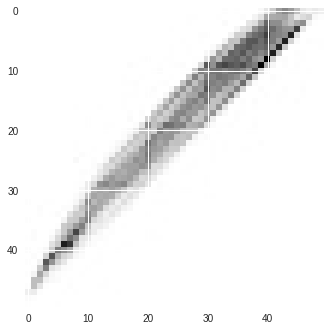

In [ ]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
#image = imread('data/valid/spoof/0001.png')
image = imread('m3.jpg')
plt.imshow(image);

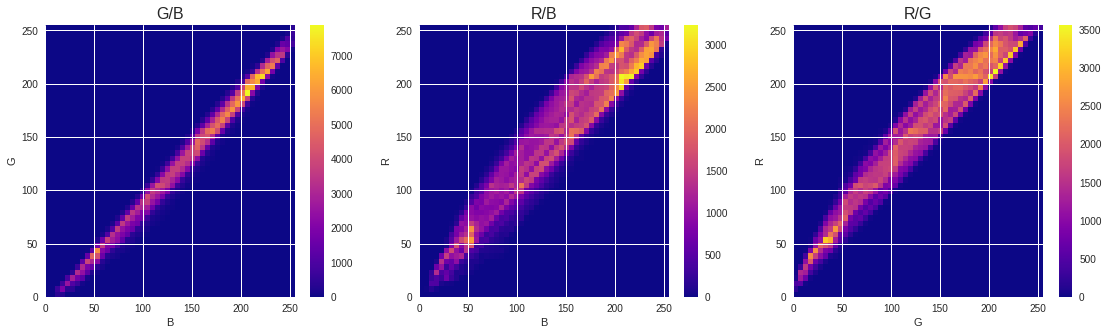

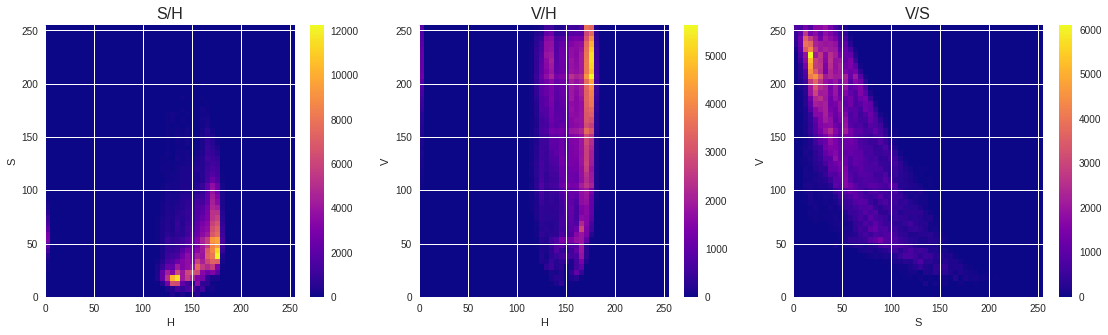

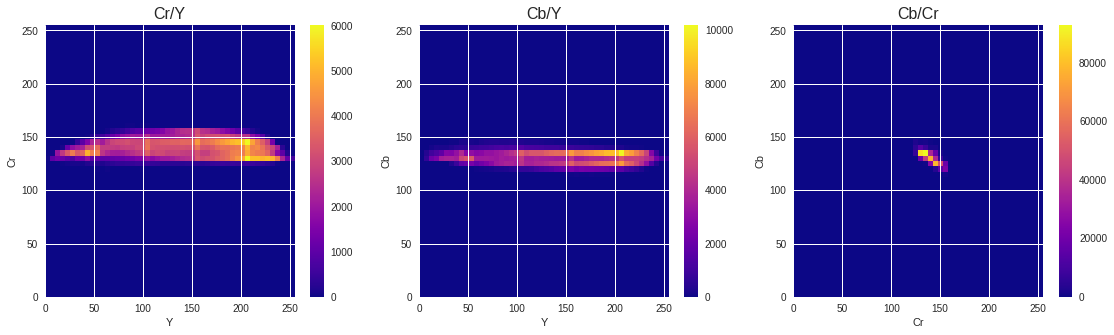

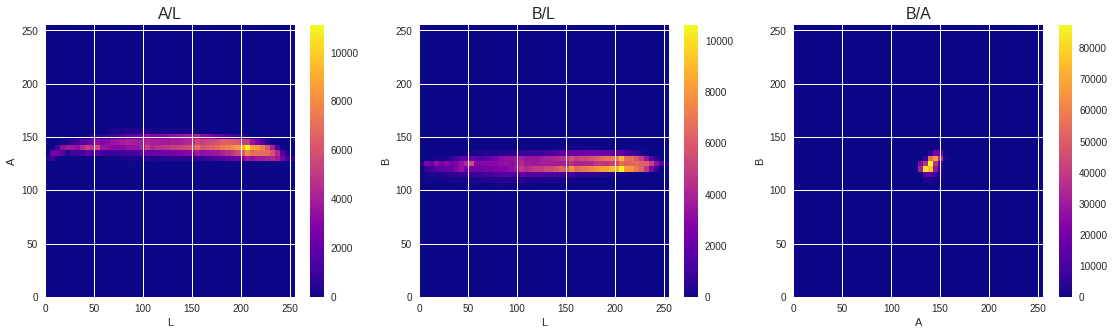

In [ ]:
plot2DHistograms('data/valid/spoof/0001.png')

In [ ]:
plot2DHistograms('data/valid/real/0039.png')

NameError: ignored

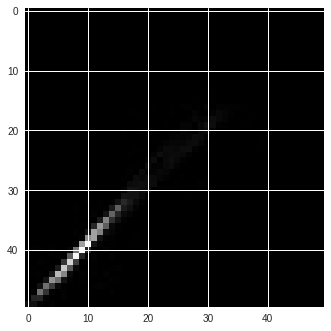

In [ ]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
#image = imread('data/valid/spoof/0001.png')
image = imread('m1.jpg')
plt.imshow(image);

In [ ]:
ls hist224/A-B/data/train/real

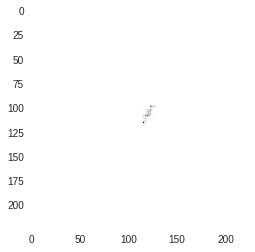

In [ ]:
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
image = imread('hist224/A-B/data/train/real/FT720P_id4_s0_120.jpg')
plt.imshow(image);

# Анализ размеров рисунков

In [ ]:
import matplotlib.pyplot as plt
import PIL
import os
import numpy as np


In [ ]:
path='data/train/real'
size_d = {k: PIL.Image.open(os.path.join(path,k)).size for k in os.listdir(path)}

In [ ]:
row_sz, col_sz = list(zip(*size_d.values()))

In [ ]:
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

In [ ]:
row_sz[:5]

array([190, 180, 168, 274, 169])

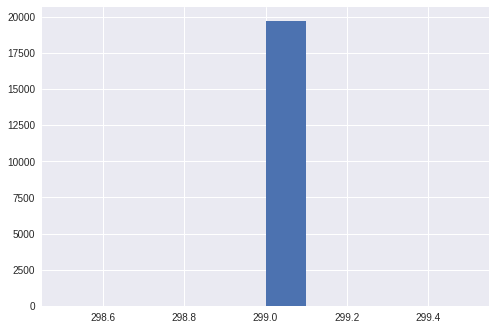

In [ ]:
plt.hist(row_sz);

(array([    0.,     0.,     0.,     0.,     0., 19693.,     0.,     0.,
            0.,     0.]),
 array([298.5, 298.6, 298.7, 298.8, 298.9, 299. , 299.1, 299.2, 299.3,
        299.4, 299.5]),
 <a list of 10 Patch objects>)

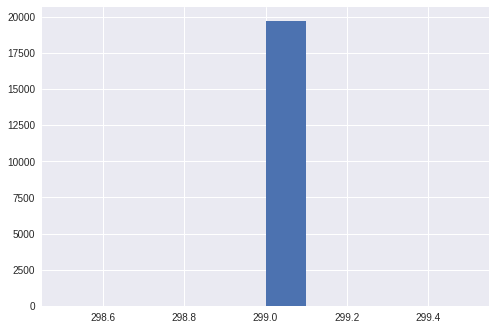

In [ ]:
plt.hist(row_sz[row_sz < 400])

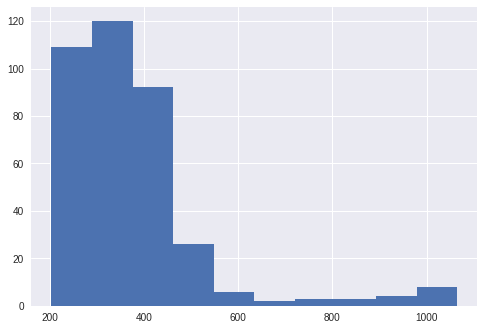

In [ ]:
plt.hist(col_sz);

(array([24., 67., 71., 56., 33., 42., 35.,  8., 12.,  5.]),
 array([203. , 242.1, 281.2, 320.3, 359.4, 398.5, 437.6, 476.7, 515.8,
        554.9, 594. ]),
 <a list of 10 Patch objects>)

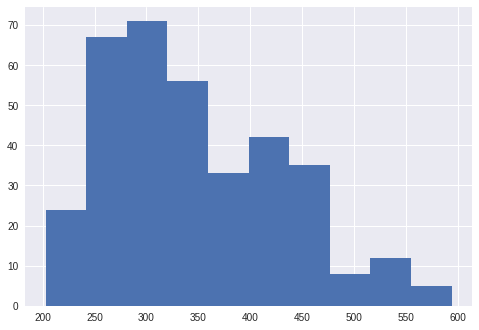

In [ ]:
plt.hist(col_sz[col_sz < 600])

In [ ]:
len(data.trn_ds), len(data.test_ds)

(8178, 10357)

In [ ]:
len(data.classes), data.classes[:5]

(120,
 ['affenpinscher',
  'afghan_hound',
  'african_hunting_dog',
  'airedale',
  'american_staffordshire_terrier'])

# Изменение размера рисунков в дереве папок

In [ ]:
#рабочая
import cv2
import os

#Сохраняем в заданную папку, при необходимости создаем ее
def imsave_subfolder(fldr,fn,img):
  if not os.path.exists(fldr):
    try:
      os.makedirs(fldr)
    except OSError as exception:
      if exception.errno != errno.EEXIST:
        raise   
  cv2.imwrite(os.path.join(fldr, fn)[:-3]+'png', img)  
  
def resizeImages(inDir,outDir,size):
  print('PROCESS - '+inDir)
  for folder, subs, files in os.walk(inDir):
    for filename in files:
      if filename.lower().endswith(('.png', '.jpg')): 
        infn=os.path.join(folder, filename)
        outpath=os.path.join(outDir, folder)
        image=cv2.imread(infn)
        im=cv2.resize(image, (size,size))
        try:
          imsave_subfolder(outpath, filename, im) 
        except:
          print("Ошибка при сохранении - "+infn)
          imsave_subfolder(outpath, filename, image) 

          
#resizeImages('Test','siw224/siw',224)                
#resizeImages('Train','siw224/siw',224)                
#resizeImages('data','data224',224)                

resizeImages('Test','siw299/siw',299)                
resizeImages('Train','siw299/siw',299)                
resizeImages('tmp/data','data299',299) 


PROCESS - Test
PROCESS - Train
PROCESS - tmp/data


In [ ]:
import shutil
shutil.rmtree('siw')

In [ ]:
#гисторгаммы тест на файле
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
import cv2
import os

img=cv2.imread('data/train/real/YOUTUBE_id67_s0_120.png')

nbins = 50
mask=img.any(axis=2)

b = img[:,:,0][mask]
g = img[:,:,1][mask]
r = img[:,:,2][mask]

m1=np.flip(np.histogram2d(b, g, bins=nbins,range=[[0,255],[0,255]])[0].T,0)
m2=np.flip(np.histogram2d(b, r, bins=nbins,range=[[0,255],[0,255]])[0].T,0)
m3=np.flip(np.histogram2d(g, r, bins=nbins,range=[[0,255],[0,255]])[0].T,0)
mx=np.max([m1,m2,m3])
mn=np.min([m1,m2,m3])
m1=255-(m1-mn)*255/(mx-mn)
m2=255-(m2-mn)*255/(mx-mn)
m3=255-(m3-mn)*255/(mx-mn)
cv2.imwrite('m1.jpg',m1)
cv2.imwrite('m2.jpg',m2)
cv2.imwrite('m3.jpg',m3)
  
  


True

# Установка XGboost с GPU

In [ ]:
!pip uninstall xgboost
#Возможно, надо перегрузить runtime после установки

In [ ]:
#XGBoost GPU
#!git clone --recursive https://github.com/dmlc/xgboost
!cd xgboost;CC=/usr/bin/gcc-6 CXX=/usr/bin/g++-6 make -j4 
!cd xgboost/build;CC=/usr/bin/gcc-6 CXX=/usr/bin/g++-6 cmake .. -DUSE_CUDA=ON -DR_LIB=OFF
!cd xgboost/build;CC=/usr/bin/gcc-6 CXX=/usr/bin/g++-6 make install -j

#!cd xgboost/python-package;CC=/usr/bin/gcc-6 CXX=/usr/bin/g++-6 python setup.py develop --user
!cd xgboost/python-package;CC=/usr/bin/gcc-6 CXX=/usr/bin/g++-6 python setup.py install



In [ ]:
# test if gpu support works
!cd xgboost && python tests/benchmark/benchmark_linear.py